# Future Years

In [1]:
import time
# Start the timer
start_time = time.time()
start_time

1692798674.009905

PyPSA-GB can model the GB power system  by solving a network constrained Linear Optimal Power Flow (LOPF) problem. This notebook shows the example application of a FES 2022.

In [2]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [3]:
import pypsa
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.style.use('ggplot')
import pandas as pd
import cartopy.crs as ccrs
import data_reader_writer

## Setting up simulation

Set the required inputs for the LOPF: the start, end and year of simulation, and the timestep.

In [4]:
network = pypsa.Network()
network.import_from_csv_folder('LOPF_data_electricityonly_2022')

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
INFO:pypsa.io:Imported network LOPF_data_electricityonly_2022 has buses, generators, lines, loads, storage_units


Links need to be scaled up to accomadate for future generation.

In [5]:
contingency_factor = 0.7
network.lines.s_max_pu *= contingency_factor

In [6]:
network

PyPSA Network
Components:
 - Bus: 29
 - Generator: 433
 - Line: 99
 - Load: 29
 - StorageUnit: 120
Snapshots: 8760

In [7]:
network.consistency_check()

In [8]:
# Let us make the boilers extendable
network.generators.loc[network.generators.carrier=='heat','p_nom_extendbale']=True

In [9]:
#network.model
Linopy_model=network.optimize.create_model()

C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-fix-p-ramp_limit_up` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-fix-p-ramp_limit_down` to match existing coordinates.
  warnings.warn(


In [10]:

#network.model.constraints.remove("Kirchhoff-Voltage-Law")

def remove_kvl(network, sns):
    print("KVL removed!")
    network.model.constraints.remove("Kirchhoff-Voltage-Law")

network.optimize(solver_name='gurobi',extra_functionality=remove_kvl)
#network.optimize(solver_name='gurobi')

C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-fix-p-ramp_limit_up` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-fix-p-ramp_limit_down` to match existing coordinates.
  warnings.warn(
INFO:linopy.model: Solve linear problem using Gurobi solver


KVL removed!


Writing variables.: 100%|████████████████████████████████████████████████████████████████| 6/6 [00:11<00:00,  1.94s/it]

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-29


Read LP format model from file C:\Users\salene\AppData\Local\Temp\linopy-problem-4hppckpg.lp
Reading time = 46.92 seconds
obj: 24518374 rows, 7813920 columns, 42633068 nonzeros
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 24518374 rows, 7813920 columns and 42633068 nonzeros
Model fingerprint: 0x8c88b818
Coefficient statistics:
  Matrix range     [7e-01, 1e+00]
  Objective range  [5e+00, 1e+09]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-07, 3e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 23090508 rows and 1141588 columns (presolve time = 6s) ...
Presolve removed 23090508 rows and 3129870 columns (presolve time = 10s) ...
Presolve removed 23091066 rows and 3157072 columns (presolve tim

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 7813920 primals, 24518374 duals
Objective: 6.59e+09
Solver model: available
Solver message: 2



('ok', 'optimal')

In [11]:
# let us check and Analyse the constraints, we set afer the network created
network.storage_units_t.state_of_charge

StorageUnit,Dinorwig,Ffestiniog,Cruachan,Foyers,Beauly Battery,Peterhead Battery,Errochty Battery,Denny/Bonnybridge Battery,Neilston Battery,Strathaven Battery,...,Pelham P2G,Penwortham P2G,Ratcliffe P2G,S.W.Penisula P2G,Sellindge P2G,Stella West P2G,Sundon/East Claydon P2G,Th. Marsh/Stocksbridge P2G,Thornton/Drax/Eggborough P2G,Walpole P2G
snapshot,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,8315.651565,1279.417052,7830.773160,6948.589110,86.784654,86.784654,13.909397,86.784654,13.909397,86.784654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-01 01:00:00,8315.651565,1279.417052,7631.177802,6948.589110,86.784654,86.784654,0.000000,86.784654,13.909397,86.784654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-01 02:00:00,8315.651566,928.504273,7696.675948,6948.589110,86.784654,86.784654,0.000000,86.784654,13.909397,86.784654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-01 03:00:00,8315.651566,928.504273,7696.675948,6601.768301,86.784654,86.784654,0.000000,86.784654,21.014735,86.784654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-01 04:00:00,8315.651566,928.504273,7450.173161,6601.768301,86.784654,86.784654,0.000000,86.784654,21.014735,86.784654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,0.000000,0.000000,1791.180235,0.000000,0.000000,0.000000,72.875257,0.000000,13.909397,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-12-31 20:00:00,0.000000,0.000000,1415.164409,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-12-31 21:00:00,0.000000,0.000000,939.949743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
network.model.constraints["Bus-nodal_balance"]     # acesssin the energy balance constraint

Constraint `Bus-nodal_balance` (Bus: 5, snapshot: 8760)
-------------------------------------------------------
[Eccles, 2022-01-01 00:00:00]:  1.0 Generator-p[2022-01-01 00:00:00, Unmet Load Eccles] + 1.0 Generator-p[2022-01-01 00:00:00, Wind Onshore Eccles] + 1.0 StorageUnit-p_dispatch[2022-01-01 00:00:00, Eccles Battery] ... -1.0 Line-s[2022-01-01 00:00:00, 24] + 1.0 Line-s[2022-01-01 00:00:00, 19] + 1.0 Line-s[2022-01-01 00:00:00, 20]                      =  49.12140362
[Eccles, 2022-01-01 01:00:00]:  1.0 Generator-p[2022-01-01 01:00:00, Unmet Load Eccles] + 1.0 Generator-p[2022-01-01 01:00:00, Wind Onshore Eccles] + 1.0 StorageUnit-p_dispatch[2022-01-01 01:00:00, Eccles Battery] ... -1.0 Line-s[2022-01-01 01:00:00, 24] + 1.0 Line-s[2022-01-01 01:00:00, 19] + 1.0 Line-s[2022-01-01 01:00:00, 20]                      =  47.7305512
[Eccles, 2022-01-01 02:00:00]:  1.0 Generator-p[2022-01-01 02:00:00, Unmet Load Eccles] + 1.0 Generator-p[2022-01-01 02:00:00, Wind Onshore Eccles] + 1.0 S

Let us see which dual values were parsed. Therfore we have a look into network.model.dual

In [13]:
network.model.dual

<xarray.Dataset>
Dimensions:                                (snapshot: 8760, Generator-fix: 433,
                                            Line-fix: 99, StorageUnit-fix: 120,
                                            Bus: 5, Bus-meshed: 24,
                                            StorageUnit: 120)
Coordinates:
  * snapshot                               (snapshot) datetime64[ns] 2022-01-...
  * Generator-fix                          (Generator-fix) object 'Drax - coa...
  * Line-fix                               (Line-fix) object '0' '1' ... '98'
  * StorageUnit-fix                        (StorageUnit-fix) object 'Dinorwig...
  * Bus                                    (Bus) object 'Eccles' ... 'Torness'
  * Bus-meshed                             (Bus-meshed) object 'Keadby' ... '...
  * StorageUnit                            (StorageUnit) object 'Dinorwig' .....
Data variables: (12/15)
    Generator-fix-p-lower                  (snapshot, Generator-fix) float64 ...
    Generator-fix-p-upper                  (snapshot, Generator-fix) float64 ...
    Generator-fix-p-ramp_limit_up          (snapshot, Generator-fix) float64 ...
    Generator-fix-p-ramp_limit_down        (snapshot, Generator-fix) float64 ...
    Line-fix-s-lower                       (snapshot, Line-fix) float64 0.0 ....
    Line-fix-s-upper                       (snapshot, Line-fix) float64 0.0 ....
    ...                                     ...
    StorageUnit-fix-p_store-upper          (snapshot, StorageUnit-fix) float64 ...
    StorageUnit-fix-state_of_charge-lower  (snapshot, StorageUnit-fix) float64 ...
    StorageUnit-fix-state_of_charge-upper  (snapshot, StorageUnit-fix) float64 ...
    Bus-nodal_balance                      (Bus, snapshot) float64 0.0 ... 70.83
    Bus-meshed-nodal_balance               (Bus-meshed, snapshot) float64 0.0...
    StorageUnit-energy-balance             (snapshot, StorageUnit) float64 0....

In [14]:
#network.optimize.solve_model()

## Running the optimisation

In [15]:
#network.lopf(network.snapshots, solver_name="gurobi", pyomo=False)
#network.optimize(solver_name='gurobi')  # 

In [16]:
network.generators.p_nom_opt.div(1e3) # GW  optimised capacity of generators in GW
network.storage_units.p_nom_opt.div(1e3)  # GW 
#My_network.links_t.efficiency 
network.storage_units

,p_nom,carrier,marginal_cost,max_hours,efficiency_store,efficiency_dispatch,state_of_charge_initial,bus,standing_loss,capital_cost,...,q_set,sign,build_year,lifetime,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge,cyclic_state_of_charge_per_period,inflow,p_nom_opt
StorageUnit,,,,,,,,,,,,,,,,,,,,,
Dinorwig,1431.724138,Pumped Storage Hydroelectric,0.0,5.808138e+00,0.865,0.865,8315.651565,Deeside,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,1431.724138
Ffestiniog,298.275862,Pumped Storage Hydroelectric,0.0,4.289375e+00,0.850,0.850,1279.417052,Deeside,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,298.275862
Cruachan,440.000000,Pumped Storage Hydroelectric,0.0,1.779721e+01,0.865,0.865,7830.773160,Errochty,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,440.000000
Foyers,300.000000,Pumped Storage Hydroelectric,0.0,2.316196e+01,0.865,0.865,6948.589110,Beauly,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,300.000000
Beauly Battery,69.231494,Battery,0.0,1.253543e+00,0.950,0.950,86.784654,Beauly,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,69.231494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Stella West P2G,0.632079,P2G,500.0,1.000000e+09,0.950,0.950,0.000000,Stella West,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,0.632079
Sundon/East Claydon P2G,0.203418,P2G,500.0,1.000000e+09,0.950,0.950,0.000000,Sundon/East Claydon,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,0.203418
Th. Marsh/Stocksbridge P2G,0.070416,P2G,500.0,1.000000e+09,0.950,0.950,0.000000,Th. Marsh/Stocksbridge,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,0.070416


In [17]:
network.storage_units.index[120:150]
#network.storage_units.p_nom_opt[4:33].div(1e3).values

Index([], dtype='object', name='StorageUnit')

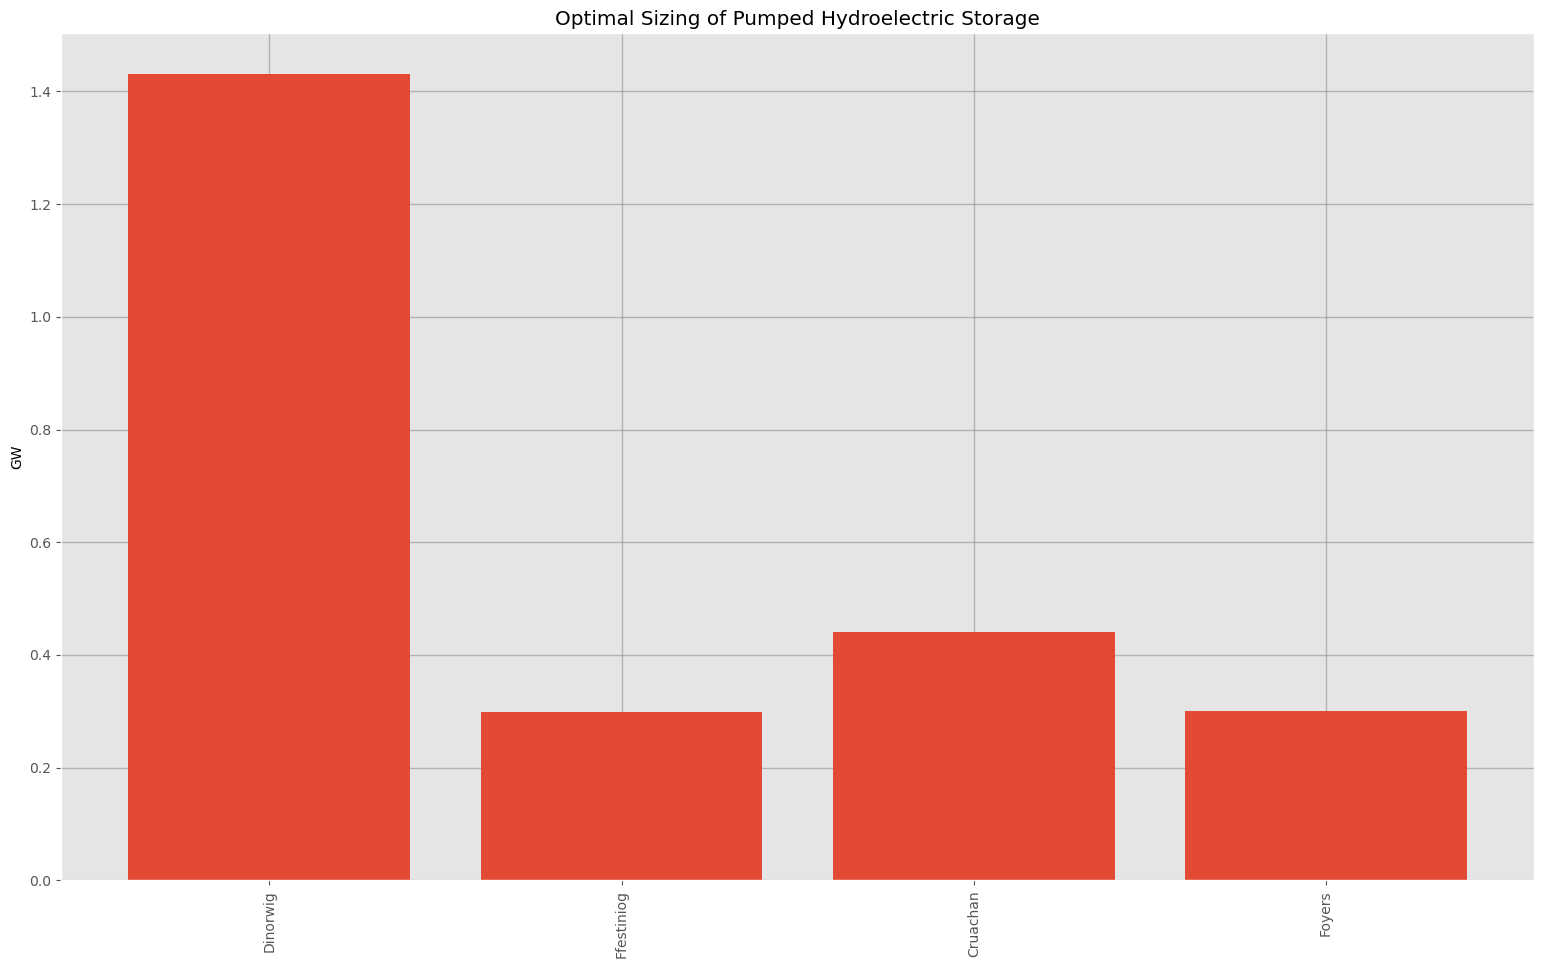

In [18]:
plt.figure(figsize=(19,11))
plt.bar(network.storage_units.index[:4], network.storage_units.p_nom_opt[:4].div(1e3).values)

plt.xticks(network.storage_units.index[:4], rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Optimal Sizing of Pumped Hydroelectric Storage')
plt.show()

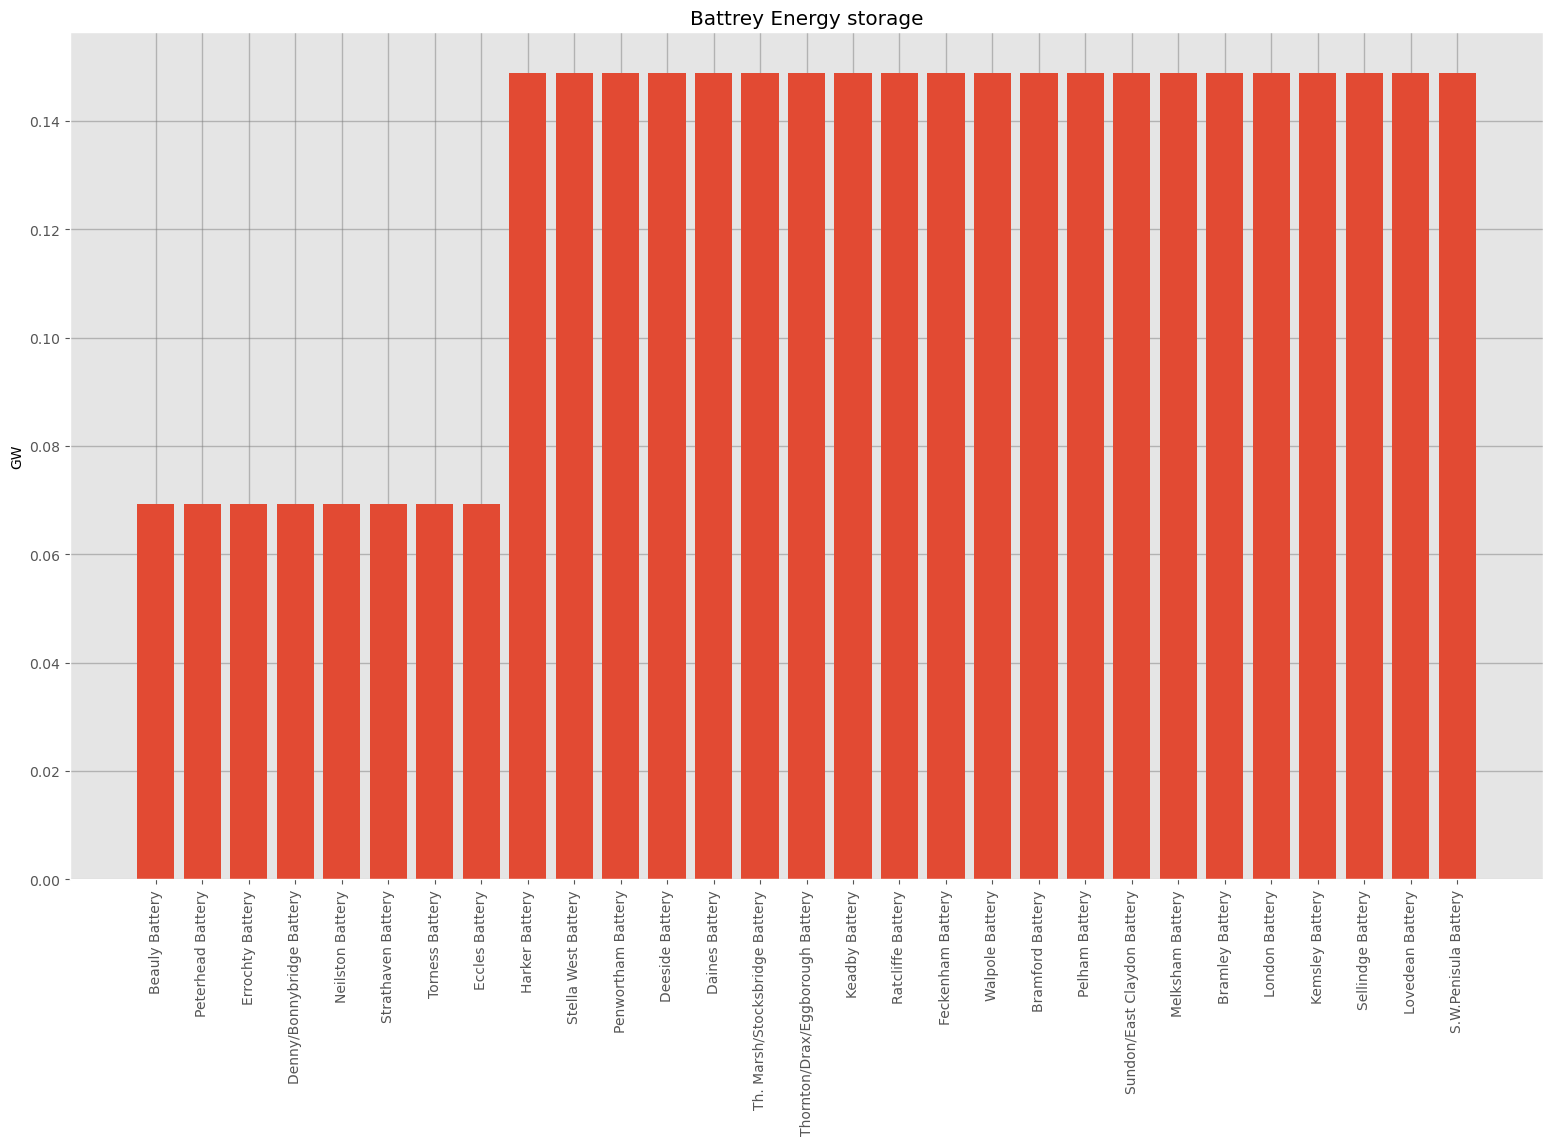

In [19]:
plt.figure(figsize=(19,11))
plt.bar(network.storage_units.index[4:33], network.storage_units.p_nom_opt[4:33].div(1e3).values)

plt.xticks(network.storage_units.index[4:33], rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Battrey Energy storage')
plt.show()

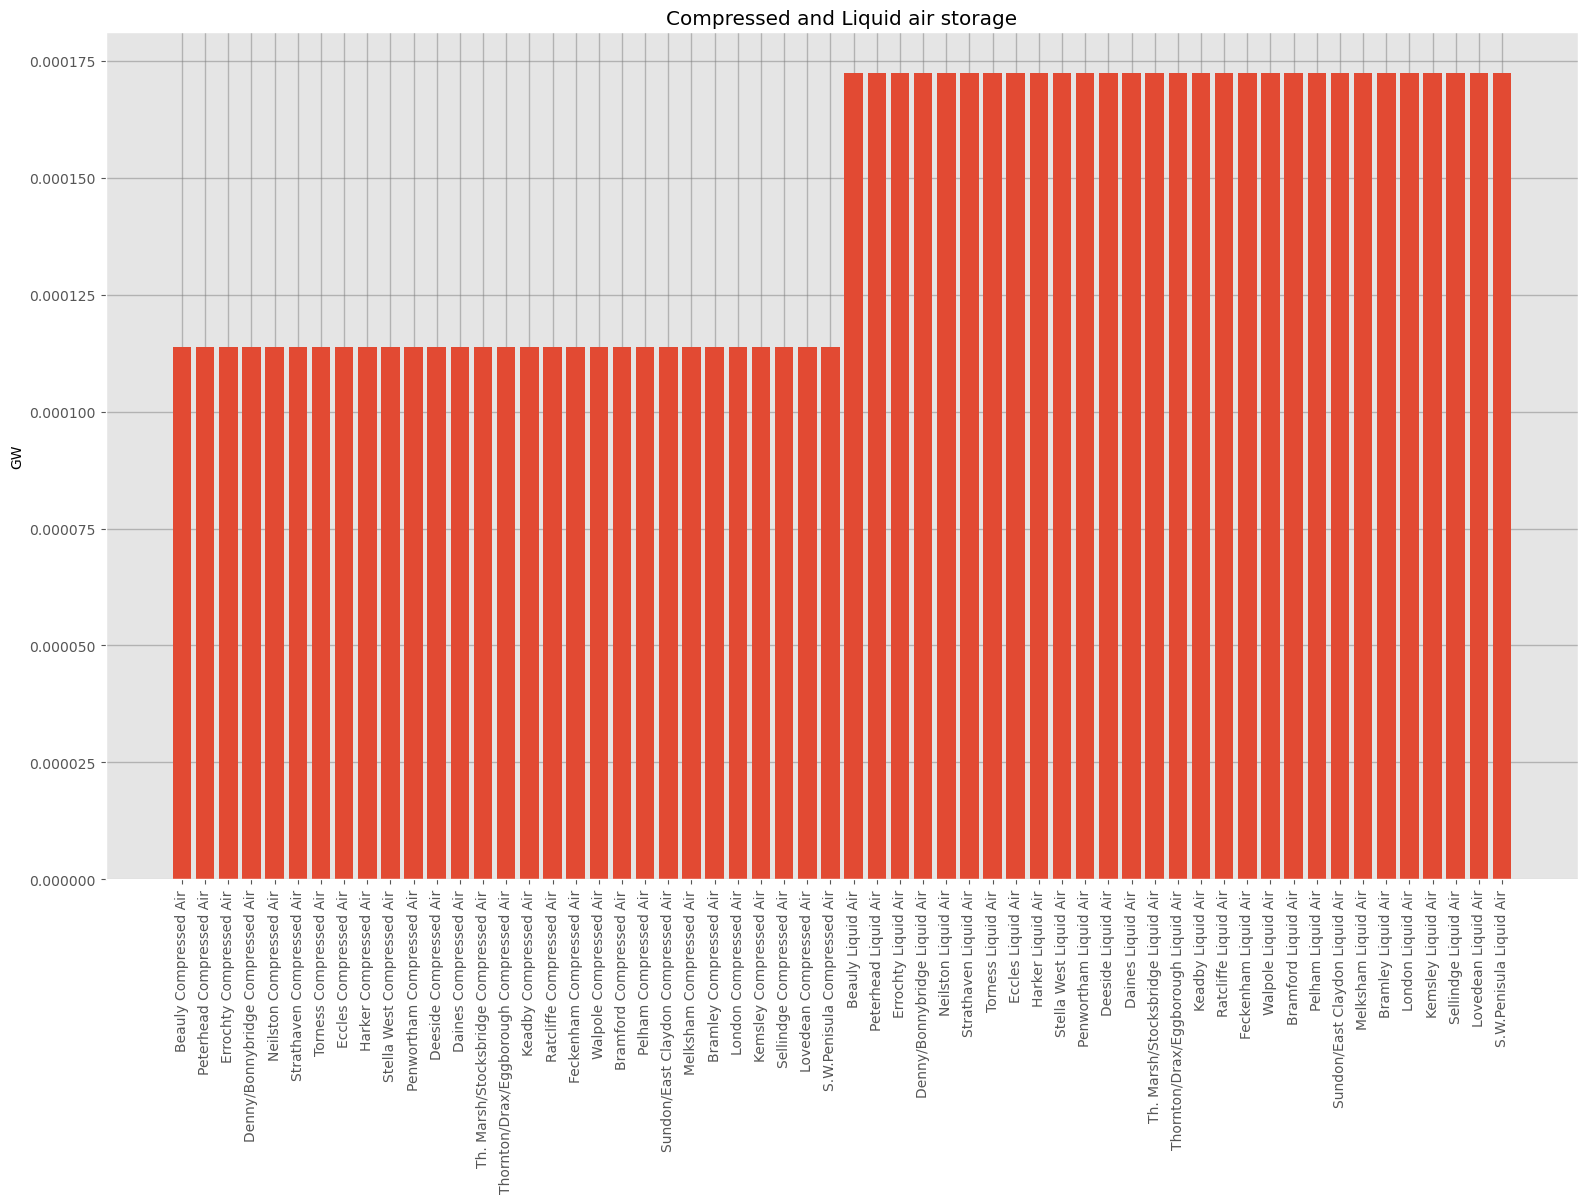

In [20]:
plt.figure(figsize=(19,11))
plt.bar(network.storage_units.index[33:91], network.storage_units.p_nom_opt[33:91].div(1e3).values)

plt.xticks(network.storage_units.index[33:91], rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Compressed and Liquid air storage')
plt.show()

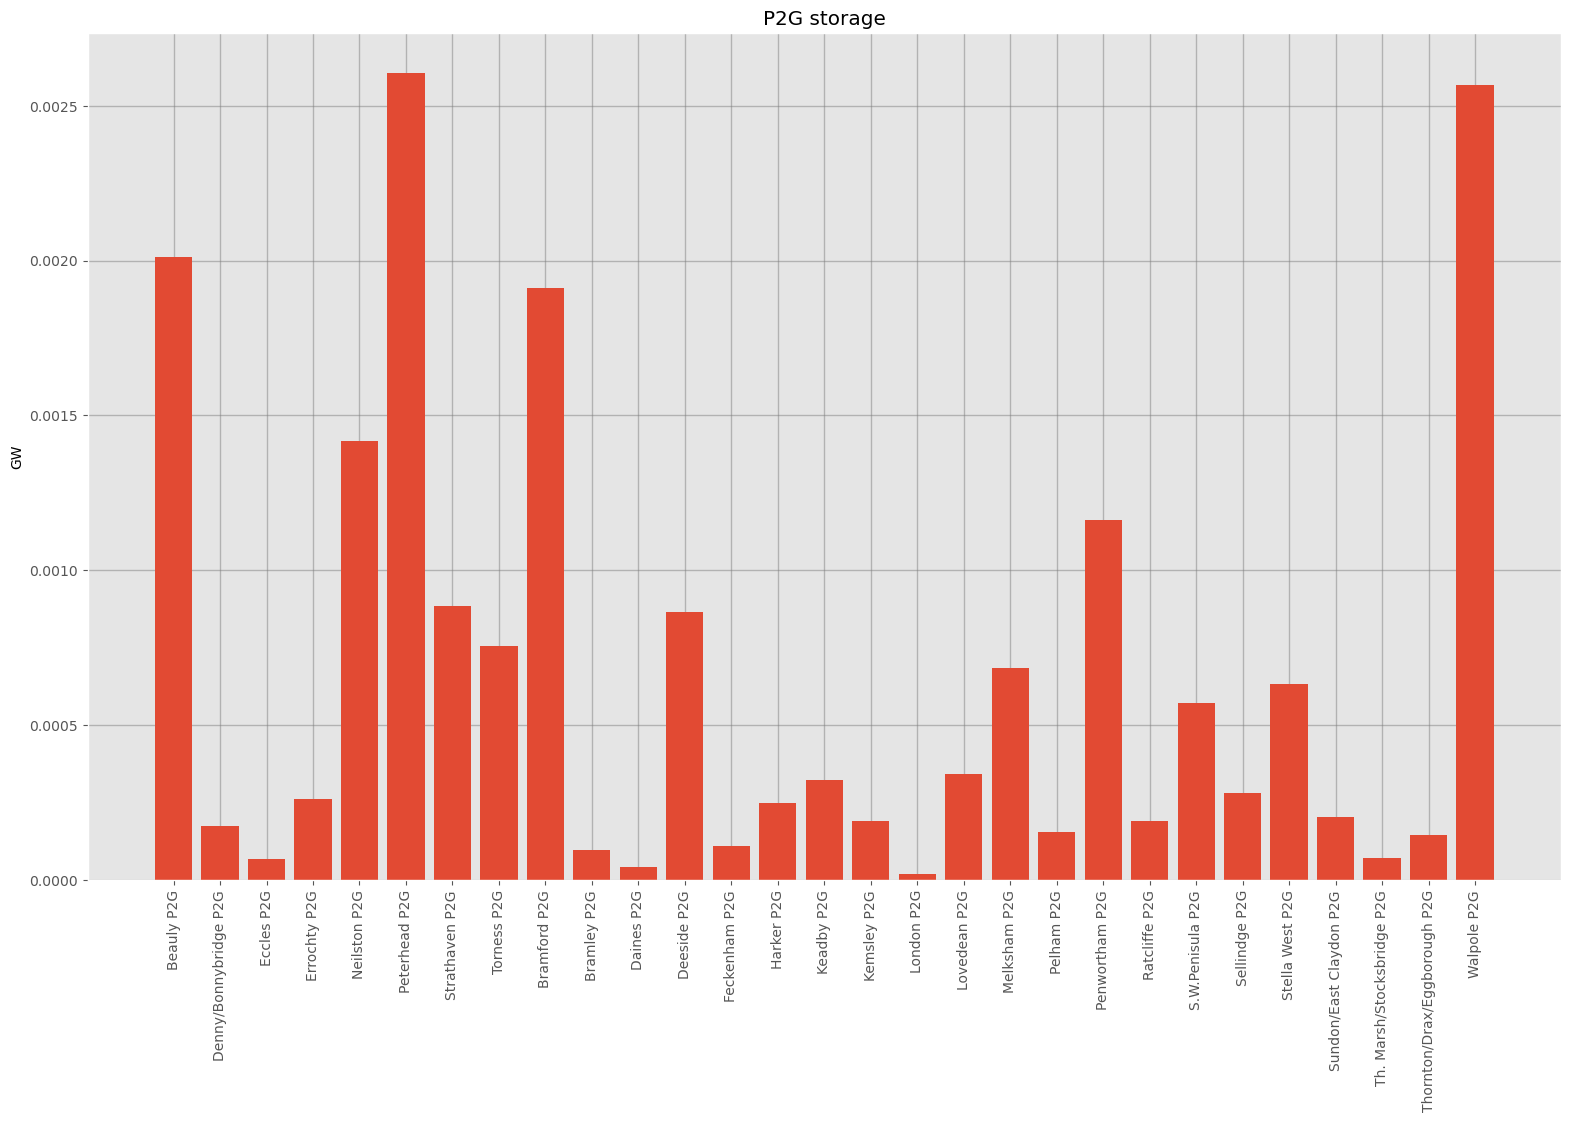

In [21]:
plt.figure(figsize=(19,11))
plt.bar(network.storage_units.index[91:120], network.storage_units.p_nom_opt[91:120].div(1e3).values)

plt.xticks(network.storage_units.index[91:120], rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('P2G storage')
plt.show()

## Power output by generation type

Group the generators by the carrier, and print their summed power outputs over the simulation period.

In [22]:
year=2022

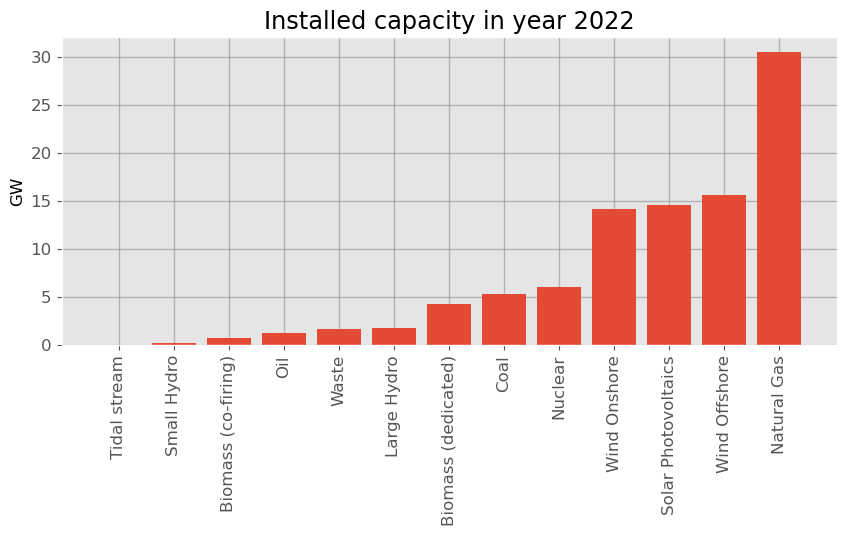

In [23]:
p_by_carrier = network.generators_t.p.groupby(
    network.generators.carrier, axis=1).sum()

storage_by_carrier = network.storage_units_t.p.groupby(
    network.storage_units.carrier, axis=1).sum()

# to show on graph set the negative storage values to zero
storage_by_carrier[storage_by_carrier < 0] = 0

p_by_carrier = pd.concat([p_by_carrier, storage_by_carrier], axis=1)

#imp = network.links_t.p0.copy()
#imp[imp < 0] = 0
#imp['Interconnectors Import'] = imp.sum(axis=1)
#interconnector_import = imp[['Interconnectors Import']]

#p_by_carrier = pd.concat([p_by_carrier, interconnector_import], axis=1)

#exp = network.links_t.p0.copy()
#exp[exp > 0] = 0
#exp['Interconnectors Export'] = exp.sum(axis=1)
#interconnector_export = exp[['Interconnectors Export']]

# group biomass stuff
p_by_carrier['Biomass'] = (
    p_by_carrier['Biomass (dedicated)'] + p_by_carrier['Biomass (co-firing)'])

# rename the hydro bit
p_by_carrier = p_by_carrier.rename(
    columns={'Large Hydro': 'Hydro'})
p_by_carrier = p_by_carrier.rename(
    columns={'Interconnector': 'Interconnectors Import'})

generators_p_nom = network.generators.p_nom.groupby(
    network.generators.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom.drop('Unmet Load', inplace=True)
generators_p_nom.drop(generators_p_nom[generators_p_nom < 50].index, inplace=True)

plt.rcParams.update({'font.size': 12})
# bar chart
plt.figure(figsize=(10,4))
plt.bar(generators_p_nom.index, generators_p_nom.values / 1000)
plt.xticks(generators_p_nom.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Installed capacity in year ' + str(year))
plt.show()

Graph the power output of the different generation types...

Text(0.5, 0, '')

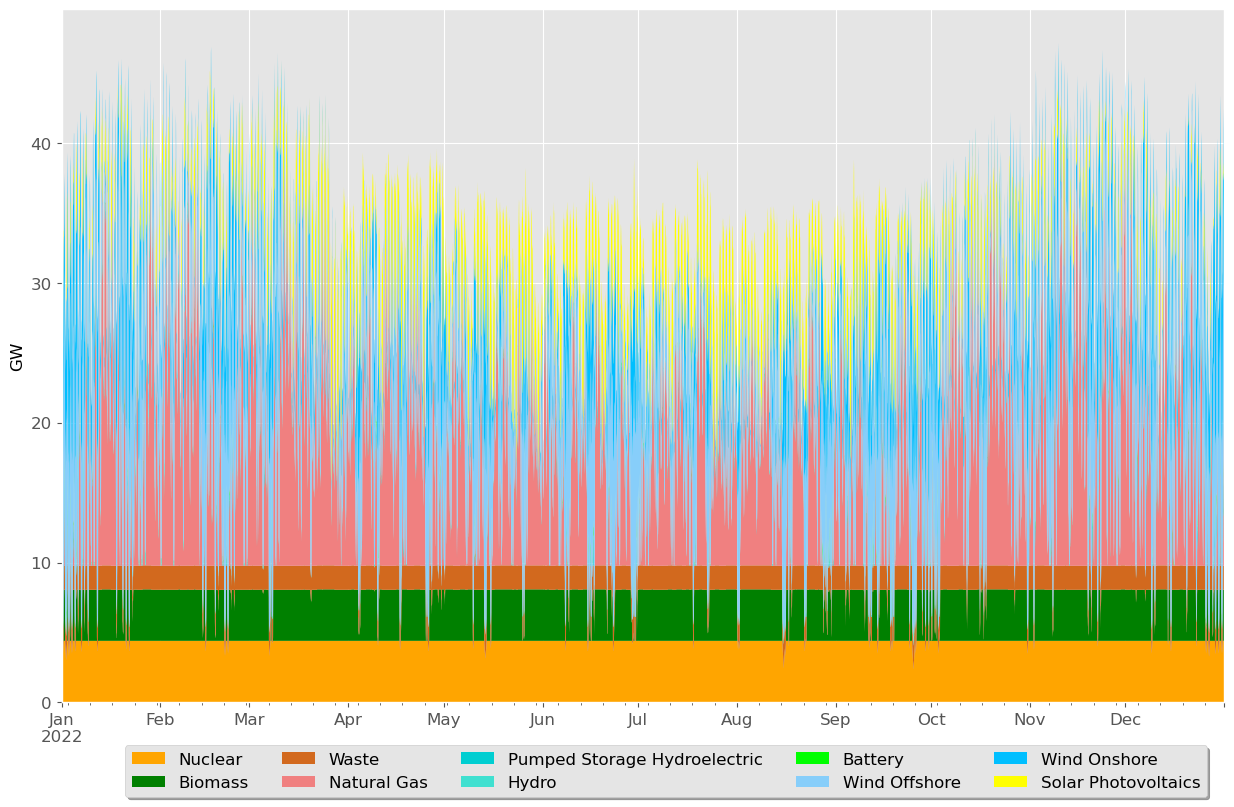

In [24]:
#cols = ["Nuclear", 'Biomass',
        #'Waste', "Oil", "Natural Gas",
       # 'Hydrogen', 'CCS Gas', 'CCS Biomass',
        #"Pumped Storage Hydroelectric", 'Hydro',
        #'Battery', 'Compressed Air', 'Liquid Air',
        #"Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        #'Interconnectors Import', 'Unmet Load'
       # ]
# ignore the import/export since the the highvoltage links are disrgearded

cols = ["Nuclear", 'Biomass',
        'Waste', "Oil", "Natural Gas",
        'Hydrogen', 'CCS Gas', 'CCS Biomass',
        "Pumped Storage Hydroelectric", 'Hydro',
        'Battery', 'Compressed Air', 'Liquid Air',
        "Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
         'Unmet Load'
        ]




p_by_carrier = p_by_carrier[cols]

p_by_carrier.drop(
    (p_by_carrier.max()[p_by_carrier.max() < 50.0]).index,
    axis=1, inplace=True)

colors = {"Coal": "grey",
          "Diesel/Gas oil": "black",
          "Diesel/gas Diesel/Gas oil": "black",
          'Oil': 'black',
          'Unmet Load': 'black',
          'Anaerobic Digestion': 'green',
          'Waste': 'chocolate',
          'Sewage Sludge Digestion': 'green',
          'Landfill Gas': 'green',
          'Biomass (dedicated)': 'green',
          'Biomass (co-firing)': 'green',
          'Biomass': 'green',
          'CCS Biomass': 'darkgreen',
          'Interconnectors Import': 'pink',
          'B6 import': 'pink',
          "Sour gas": "lightcoral",
          "Natural Gas": "lightcoral",
          'CCS Gas': "lightcoral",
          'Hydrogen': "deeppink",
          "Nuclear": "orange",
          'Shoreline Wave': 'aqua',
          'Tidal Barrage and Tidal Stream': 'aqua',
          'Hydro': "turquoise",
          "Large Hydro": "turquoise",
          "Small Hydro": "turquoise",
          "Pumped Storage Hydroelectric": "darkturquoise",
          'Battery': 'lime',
          'Compressed Air': 'greenyellow',
          'Liquid Air': 'lawngreen',
          "Wind Offshore": "lightskyblue",
          'Wind Onshore': 'deepskyblue',
          'Solar Photovoltaics': 'yellow'}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
(p_by_carrier / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier.columns])

# # stacked area plot of negative values, prepend column names with '_' such that they don't appear in the legend
# (interconnector_export / 1e3).plot.area(ax=ax, stacked=True, linewidth=0.)
# # rescale the y axis
# ax.set_ylim([(interconnector_export / 1e3).sum(axis=1).min(), (p_by_carrier / 1e3).sum(axis=1).max()])

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.52, -0.05),
          fancybox=True, shadow=True, ncol=5)

ax.set_ylabel("GW")

ax.set_xlabel("")

## Plotting storage

Graph the pumped hydro dispatch and state of charge...

Text(0.5, 0, '')

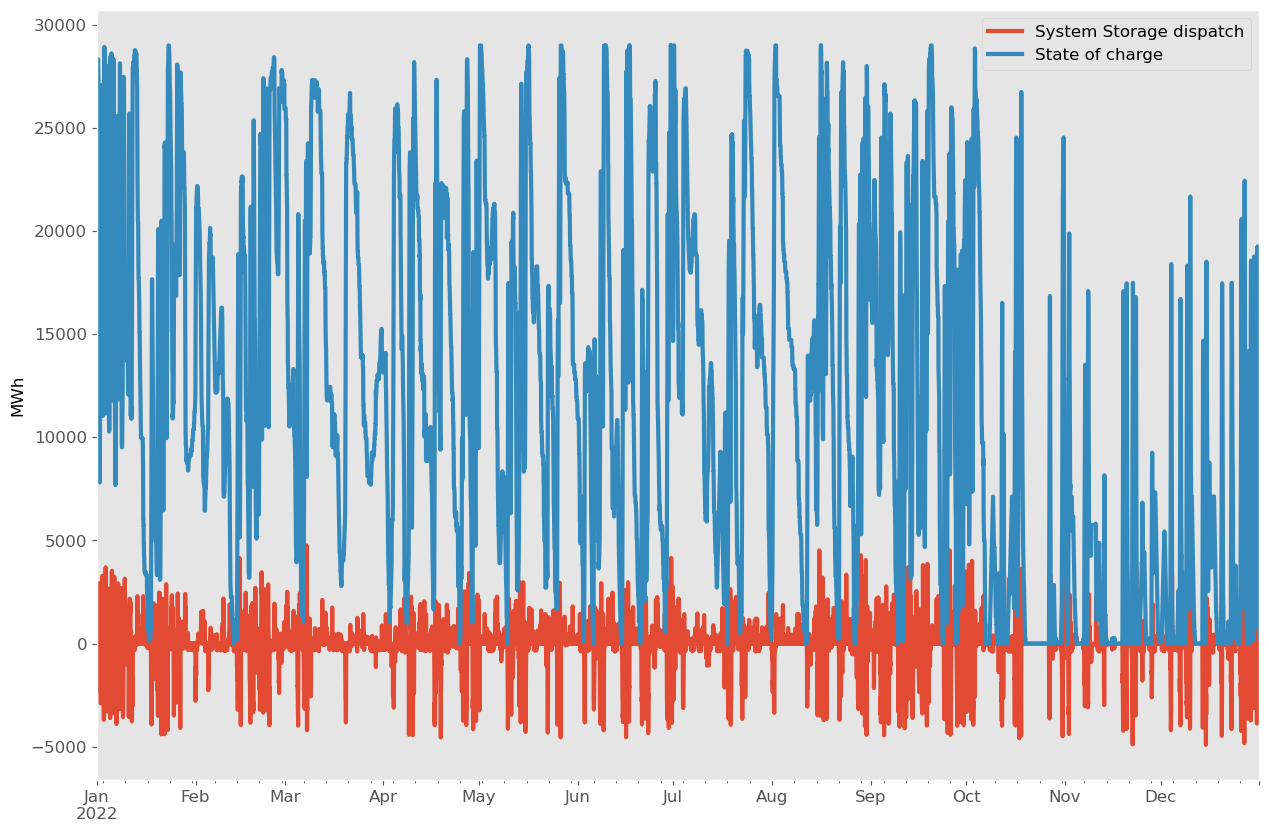

In [25]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage = network.storage_units_t.p.sum(axis=1)

state_of_charge = network.storage_units_t.state_of_charge.sum(axis=1)
p_storage.plot(label="System Storage dispatch", ax=ax, linewidth=3)
state_of_charge.plot(label="State of charge", ax=ax, linewidth=3)

ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")

Let us plot the state of charge and dispatch for each type of storages separately

Text(0.5, 0, '')

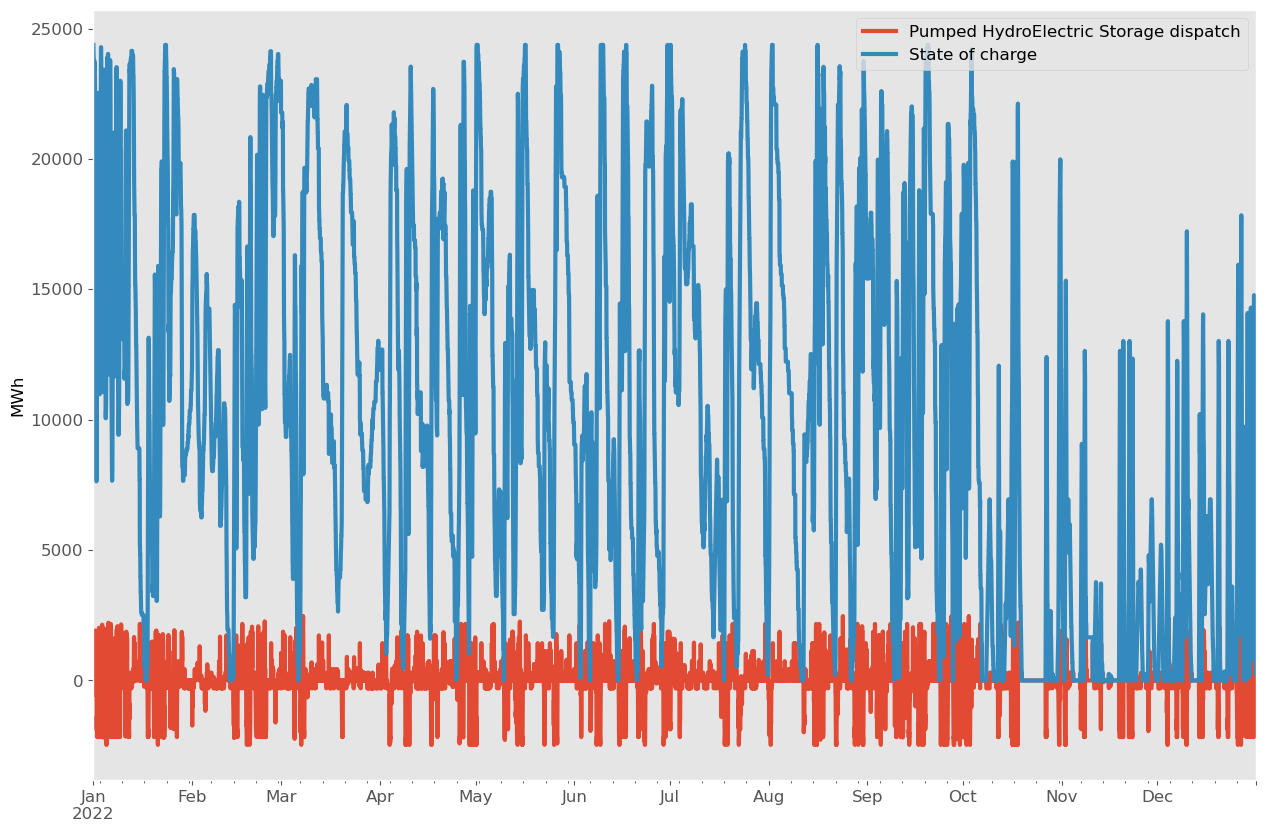

In [26]:
network.storage_units_t.state_of_charge.iloc[: , :4].sum(axis=1)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage_PumpedHydorES = network.storage_units_t.p.iloc[: , :4].sum(axis=1)

state_of_charge_PumpedHydroES = network.storage_units_t.state_of_charge.iloc[: , :4].sum(axis=1)


p_storage_PumpedHydorES.plot(label="Pumped HydroElectric Storage dispatch", ax=ax, linewidth=3)
state_of_charge_PumpedHydroES.plot(label="State of charge", ax=ax, linewidth=3)
ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")


Text(0.5, 0, '')

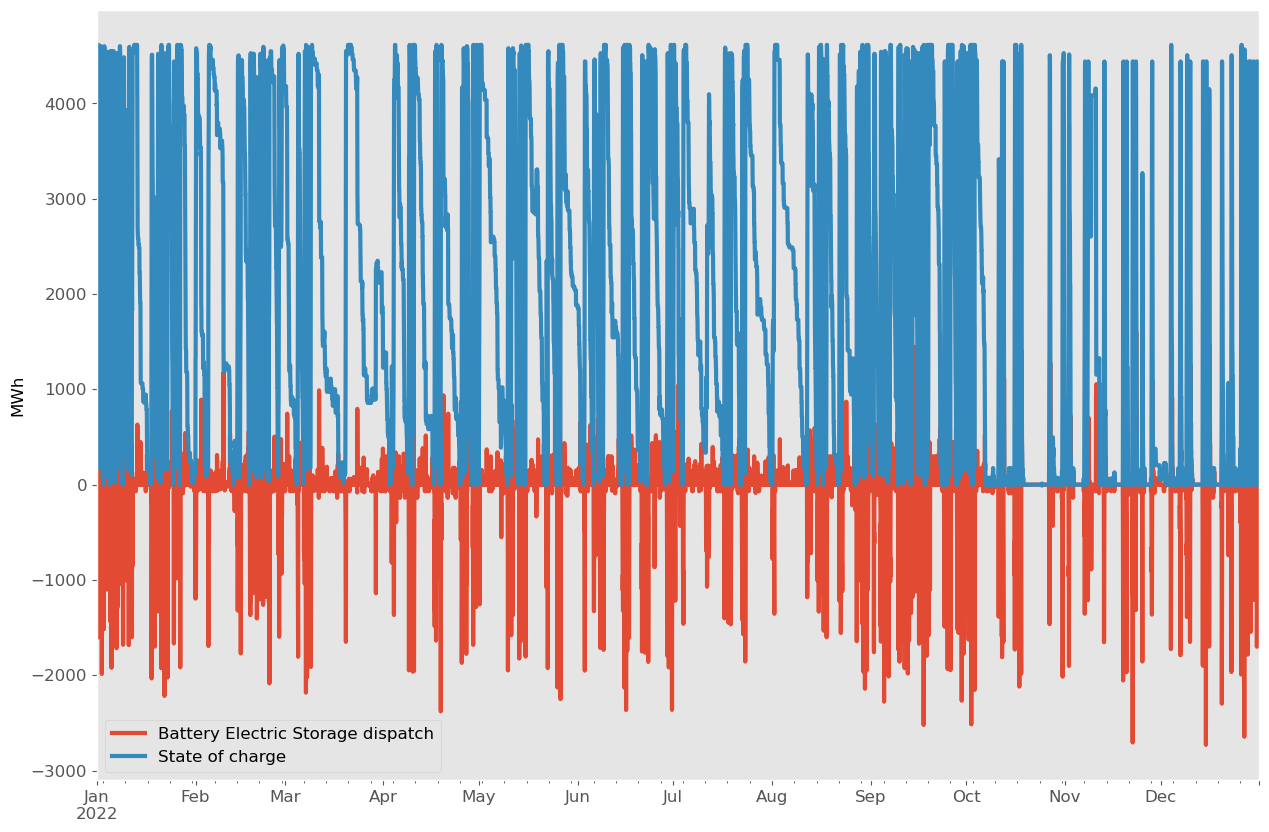

In [27]:
network.storage_units_t.state_of_charge.iloc[: , 4:33].sum(axis=1)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage_PumpedHydorES = network.storage_units_t.p.iloc[: , 4:33].sum(axis=1)

state_of_charge_PumpedHydroES = network.storage_units_t.state_of_charge.iloc[: , 4:33].sum(axis=1)


p_storage_PumpedHydorES.plot(label="Battery Electric Storage dispatch", ax=ax, linewidth=3)
state_of_charge_PumpedHydroES.plot(label="State of charge", ax=ax, linewidth=3)
ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")


Text(0.5, 0, '')

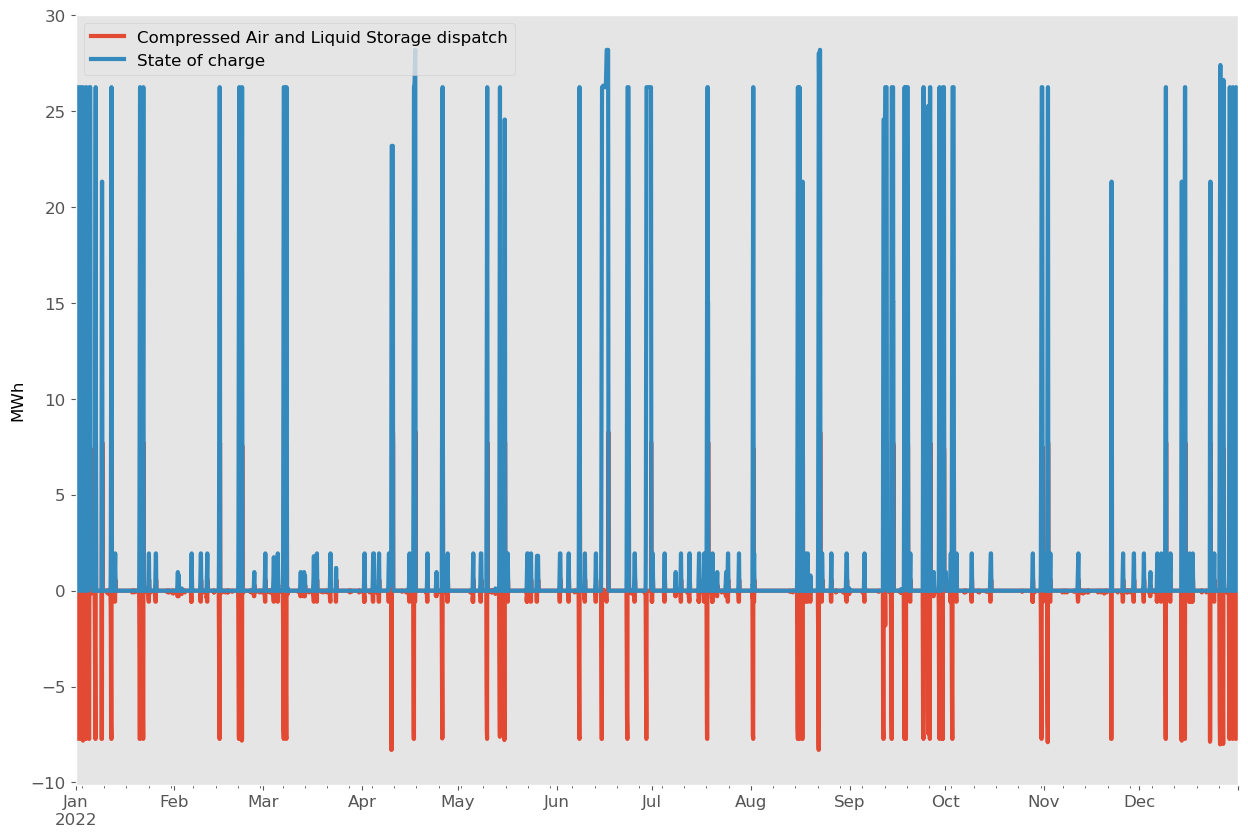

In [28]:
network.storage_units_t.state_of_charge.iloc[: , 33:91].sum(axis=1)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage_PumpedHydorES = network.storage_units_t.p.iloc[: , 33:91].sum(axis=1)

state_of_charge_PumpedHydroES = network.storage_units_t.state_of_charge.iloc[: , 33:91].sum(axis=1)


p_storage_PumpedHydorES.plot(label="Compressed Air and Liquid Storage dispatch", ax=ax, linewidth=3)
state_of_charge_PumpedHydroES.plot(label="State of charge", ax=ax, linewidth=3)
ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")


Text(0.5, 0, '')

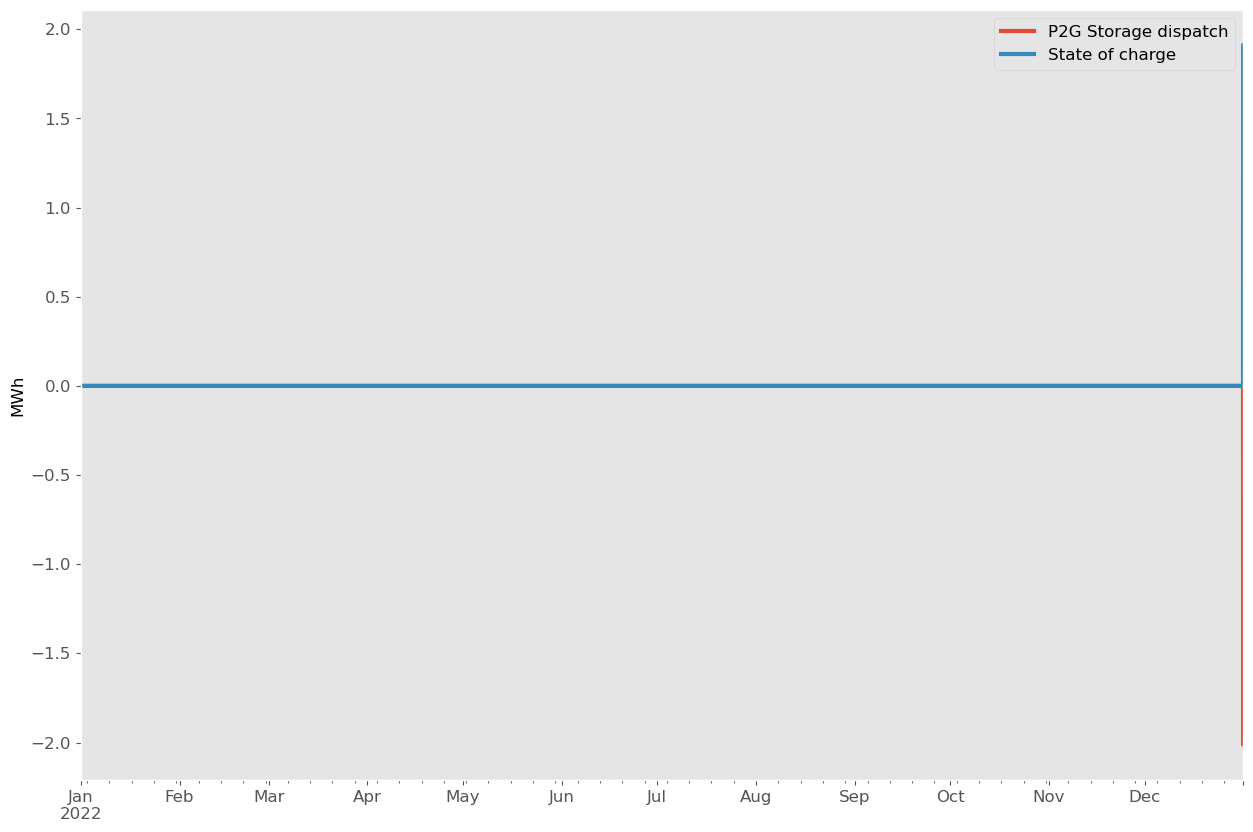

In [29]:
network.storage_units_t.state_of_charge.iloc[: , 91:120].sum(axis=1)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage_PumpedHydorES = network.storage_units_t.p.iloc[: , 91:120].sum(axis=1)

state_of_charge_PumpedHydroES = network.storage_units_t.state_of_charge.iloc[: , 91:120].sum(axis=1)


p_storage_PumpedHydorES.plot(label="P2G Storage dispatch", ax=ax, linewidth=3)
state_of_charge_PumpedHydroES.plot(label="State of charge", ax=ax, linewidth=3)
ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")


## Plotting line loading

Look at the line loading stats and graph...

In [30]:
now = network.snapshots[60]

print("With the linear load flow, there is the following per unit loading:")
loading = network.lines_t.p0.loc[now] / network.lines.s_nom
loading.describe()

With the linear load flow, there is the following per unit loading:


count    99.000000
mean      0.047040
std       0.630936
min      -0.700000
25%      -0.700000
50%       0.139073
75%       0.700000
max       0.700000
dtype: float64

(<matplotlib.collections.PatchCollection at 0x245610e74c0>,
 <matplotlib.collections.LineCollection at 0x24561104160>)

C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


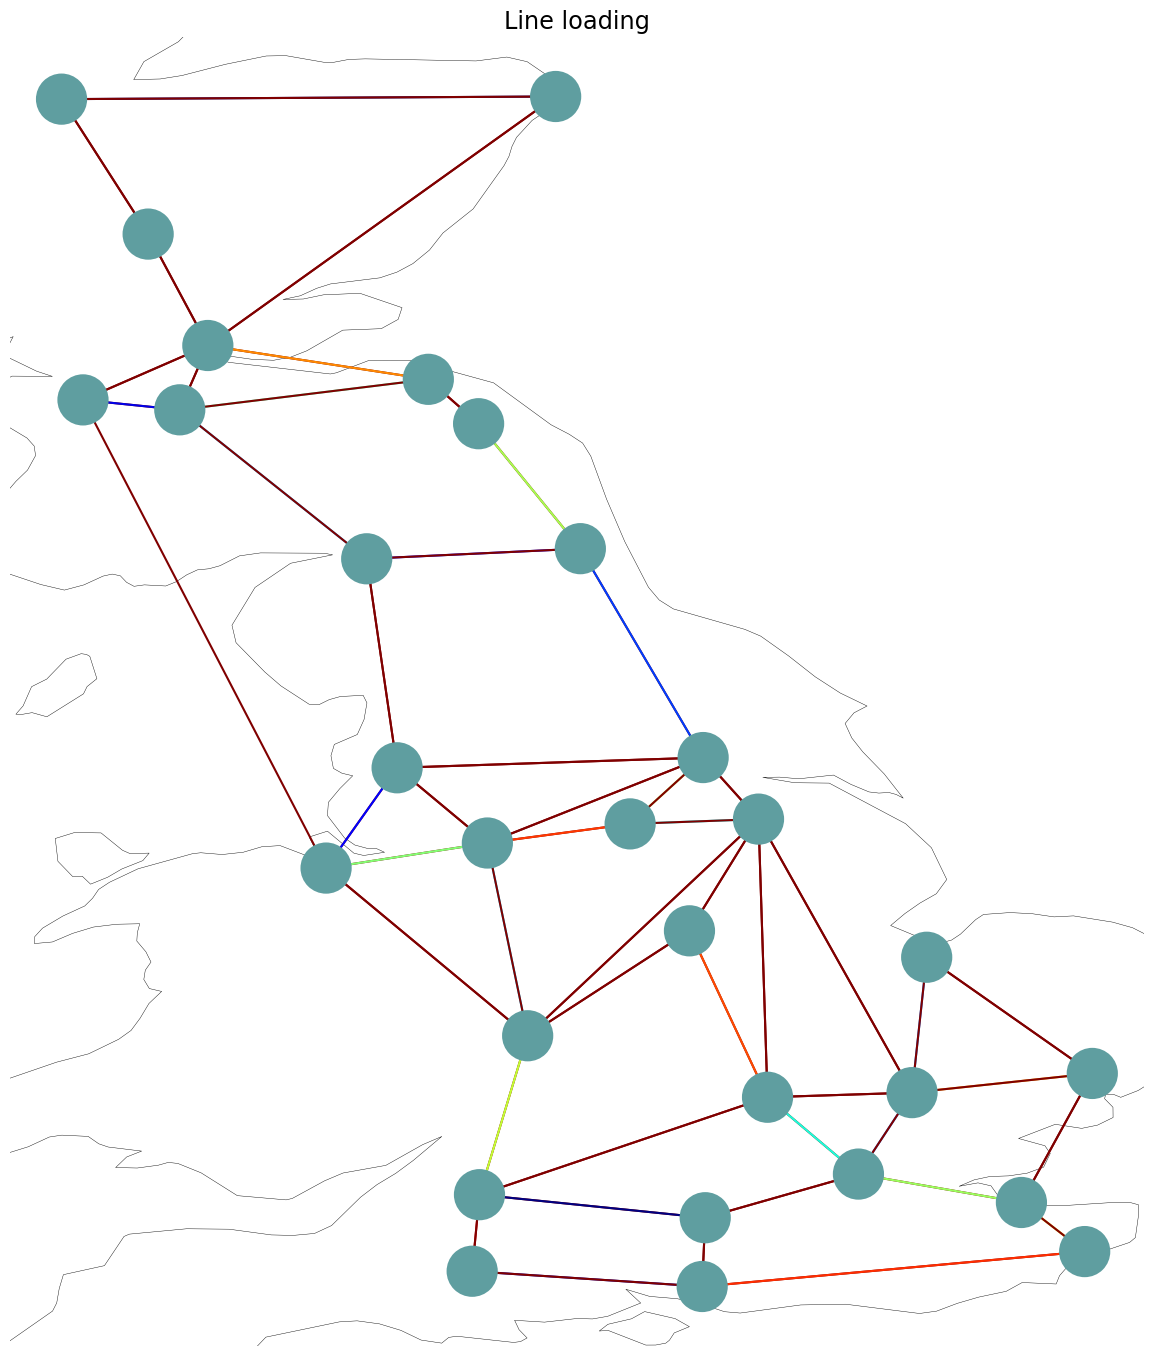

In [31]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(15, 17)

network.plot(ax=ax, line_colors=abs(loading), line_cmap=plt.cm.jet, title="Line loading")

## Plotting locational marginal prices

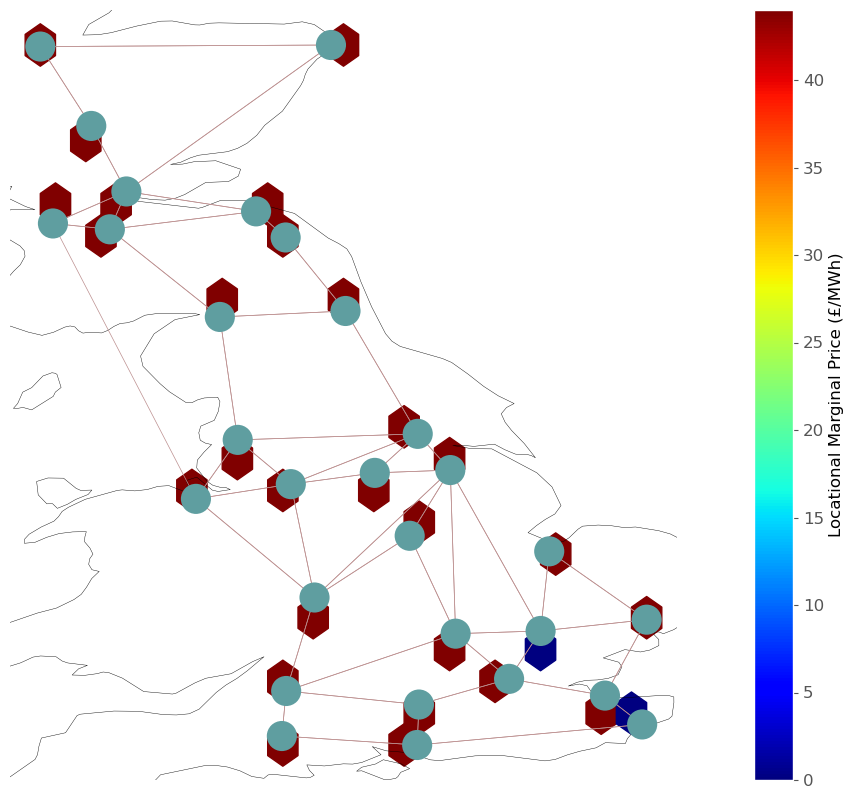

In [32]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(20, 10)

network.plot(ax=ax, line_widths=pd.Series(0.5, network.lines.index))
plt.hexbin(network.buses.x, network.buses.y,
           gridsize=20,
           C=network.buses_t.marginal_price.loc[now],
           cmap=plt.cm.jet)

# for some reason the colorbar only works with graphs plt.plot
# and must be attached plt.colorbar

cb = plt.colorbar()
cb.set_label('Locational Marginal Price (£/MWh)')

In [33]:
network.buses_t.marginal_price

,Eccles,Errochty,Sellindge,Strathaven,Torness,Keadby,Melksham,Deeside,Kemsley,Thornton/Drax/Eggborough,...,Walpole,Beauly,Bramford,Denny/Bonnybridge,Penwortham,Neilston,Harker,Peterhead,Pelham,Bramley
snapshot,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2022-01-01 01:00:00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2022-01-01 02:00:00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2022-01-01 03:00:00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2022-01-01 04:00:00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,70.826725,58.80584,70.826725,70.826725,70.826725,70.826725,70.826725,70.826725,70.826725,70.826725,...,70.826725,0.0,70.826725,70.826725,70.826725,70.826725,70.826725,0.0,70.826725,70.826725
2022-12-31 20:00:00,70.826725,58.80584,70.826725,70.826725,70.826725,70.826725,70.826725,70.826725,70.826725,70.826725,...,70.826725,0.0,70.826725,70.826725,70.826725,70.826725,70.826725,0.0,70.826725,70.826725
2022-12-31 21:00:00,70.826725,58.80584,70.826725,70.826725,70.826725,70.826725,70.826725,70.826725,70.826725,70.826725,...,70.826725,0.0,70.826725,70.826725,70.826725,70.826725,70.826725,0.0,70.826725,70.826725


## Plotting curtailment

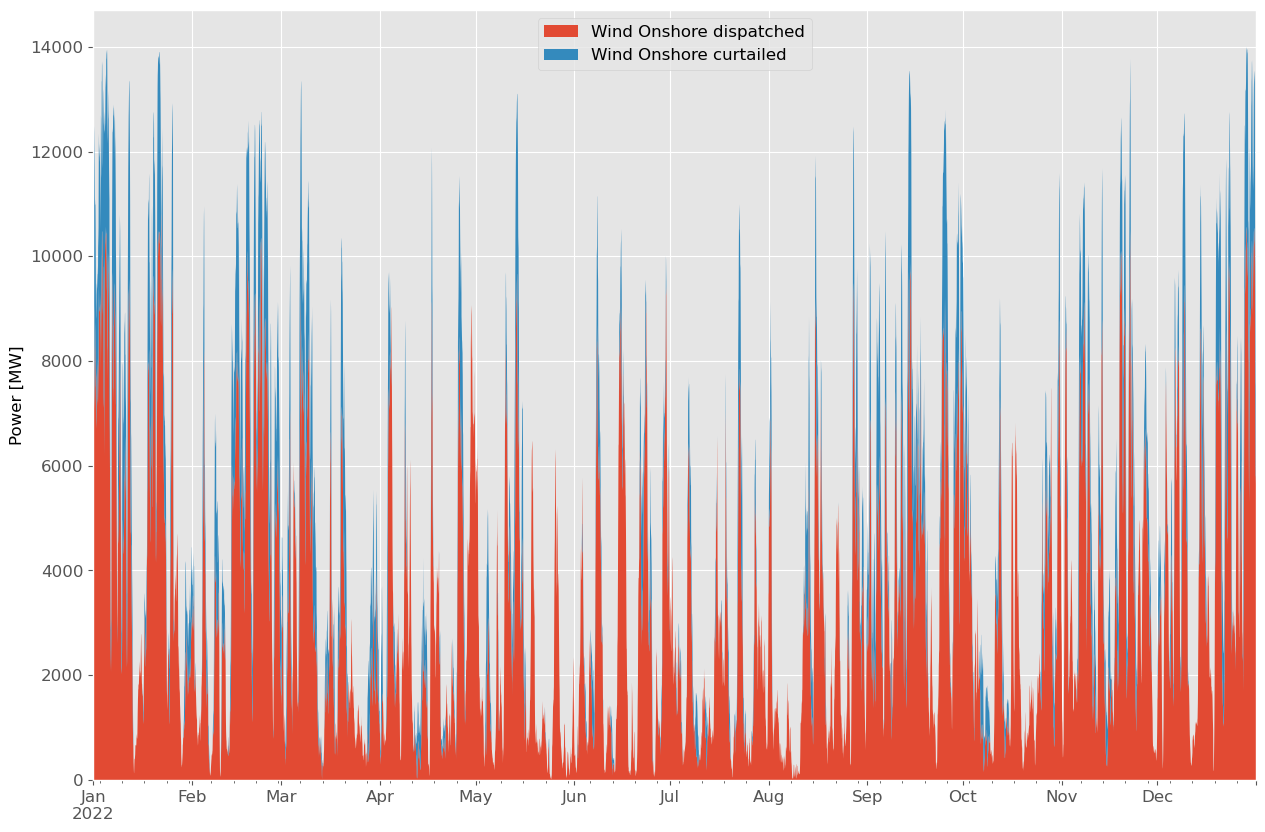

In [60]:
carrier = "Wind Onshore"

capacity = network.generators.groupby("carrier").sum().at[carrier, "p_nom"]
p_available = network.generators_t.p_max_pu.multiply(network.generators["p_nom"])
p_available_by_carrier = p_available.groupby(network.generators.carrier, axis=1).sum()
p_curtailed_by_carrier = p_available_by_carrier - p_by_carrier
p_df = pd.DataFrame({carrier + " available": p_available_by_carrier[carrier],
                     carrier + " dispatched": p_by_carrier[carrier],
                     carrier + " curtailed": p_curtailed_by_carrier[carrier]})

p_df[carrier + " capacity"] = capacity
p_df["Wind Onshore curtailed"][p_df["Wind Onshore curtailed"] < 0.] = 0.
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
p_df[[carrier + " dispatched", carrier + " curtailed"]].plot(kind="area", ax=ax, linewidth=0)
# p_df[[carrier + " available", carrier + " capacity"]].plot(ax=ax, linewidth=0)

ax.set_xlabel("")
ax.set_ylabel("Power [MW]")
ax.legend()

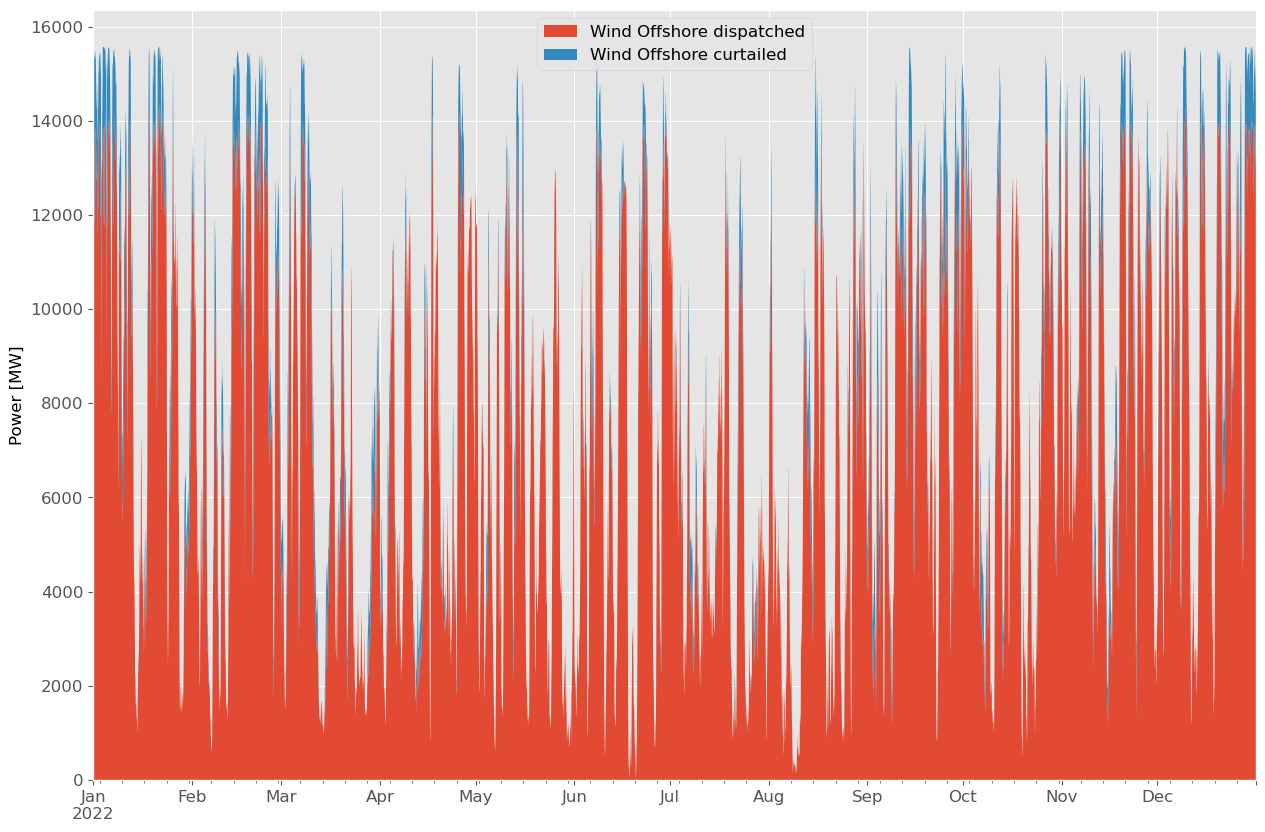

In [61]:
carrier = "Wind Offshore"

capacity = network.generators.groupby("carrier").sum().at[carrier, "p_nom"]
p_available = network.generators_t.p_max_pu.multiply(network.generators["p_nom"])
p_available_by_carrier = p_available.groupby(network.generators.carrier, axis=1).sum()
p_curtailed_by_carrier = p_available_by_carrier - p_by_carrier
p_df = pd.DataFrame({carrier + " available": p_available_by_carrier[carrier],
                     carrier + " dispatched": p_by_carrier[carrier],
                     carrier + " curtailed": p_curtailed_by_carrier[carrier]})

p_df[carrier + " capacity"] = capacity
p_df["Wind Offshore curtailed"][p_df["Wind Offshore curtailed"] < 0.] = 0.
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
p_df[[carrier + " dispatched", carrier + " curtailed"]].plot(kind="area", ax=ax, linewidth=0)
#p_df[[carrier + " available", carrier + " capacity"]].plot(ax=ax, linewidth=0)

ax.set_xlabel("")
ax.set_ylabel("Power [MW]")
ax.legend()

In [62]:
p_df[[carrier + " available", carrier + " capacity"]]

,Wind Offshore available,Wind Offshore capacity
snapshot,,
2022-01-01 00:00:00,15295.193063,15581.48
2022-01-01 01:00:00,15339.338250,15581.48
2022-01-01 02:00:00,15410.778085,15581.48
2022-01-01 03:00:00,15507.199500,15581.48
2022-01-01 04:00:00,15471.491651,15581.48
...,...,...
2022-12-31 19:00:00,15217.680141,15581.48
2022-12-31 20:00:00,14707.283137,15581.48
2022-12-31 21:00:00,13677.994250,15581.48


In [63]:
p_df[[carrier + " dispatched", carrier + " curtailed"]]

,Wind Offshore dispatched,Wind Offshore curtailed
snapshot,,
2022-01-01 00:00:00,13786.981061,1508.212002
2022-01-01 01:00:00,13399.953667,1939.384584
2022-01-01 02:00:00,13443.635336,1967.142749
2022-01-01 03:00:00,12627.380815,2879.818685
2022-01-01 04:00:00,11971.430954,3500.060698
...,...,...
2022-12-31 19:00:00,13765.990197,1451.689944
2022-12-31 20:00:00,13212.987247,1494.295890
2022-12-31 21:00:00,12161.231724,1516.762526


In [64]:
# Stop the timer and calculate elapsed time
elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")


Elapsed time: 73876.22834134102 seconds
